In [ ]:
import sys
sys.path.append('..')
import cortex_etl as c_etl

ma = c_etl.analysis_initial_processing("../configs/2-PfrTransfer/2-PfrTransfer-6-3rdConnectionRemaining.yaml", loglevel="ERROR")
ma_nbS1 = c_etl.analysis_initial_processing("../configs/5-FullCircuit/5-FullCircuit-2-BetterMinis-FprScan.yaml") #, loglevel="ERROR"

In [3]:
a = ma.hex0_spikes
a_name = "hex0_spikes"

a_nbS1 = ma_nbS1.hexes_spikes
a_nbS1_name = "hexes_spikes"

In [4]:
c_etl.post_analysis(a)
# c_etl.post_analysis(a_nbS1)


----- Custom post analysis -----


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
2023-04-13 13:03:05,914 INFO blueetl.parallel: Considering 60 rows for columns ['simulation_id', 'circuit_id']
2023-04-13 13:03:05,916 INFO blueetl.parallel: Tasks to be executed: 60
[Parallel(n_jobs=36)]: Done   3 out of  60 | elapsed:    1.5s remaining:   28.1s
[Parallel(n_jobs=36)]: Done  10 out of  60 | elapsed:    1.5s remaining:    7.5s
[Parallel(n_jobs=36)]: Done  17 out of  60 | elapsed:    1.5s remaining:    3.8s
[Parallel(n_jobs=36)]: Done  24 out of  60 | elapsed:    1.5s remaining:    2.3s
[Parallel(n_jobs=36)]: Done  31 out of  60 | elapsed:    1.7s remaining:    1.6s
[Parallel(n_jobs=36)]: Done  38 out of  60 | elapsed:    1.9s remaining:    1.1s
[Parallel(n_jobs=36)]: Done  45 out of  60 | elapsed:    2.1s remaining:    0.7s
[Parallel(n_jobs=36)]: Done  52 out of  60 | elapsed:    2.3s remaining:    0.4s
[Parallel(n_jobs=36)]: Done  60 out of  60 | elapsed:    2.5s finished
[Parallel(n_jobs=36)]

----- Custom post analysis complete: 12.98s -----


[Parallel(n_jobs=36)]: Done  60 out of  60 | elapsed:    3.2s finished


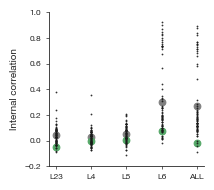

In [27]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import linregress

isolated_data = a.custom['custom_simulations_post_analysis'].etl.q(desired_connected_proportion_of_invivo_frs=0.2, depol_stdev_mean_ratio=0.4, ca=1.05)
        
plt.figure(figsize=(2,2))
spont_hists = a_nbS1.features.histograms.df.etl.q(simulation_id=4, window="conn_spont", bin_size=3.0, smoothing_type='Gaussian', kernel_sd=1.0).reset_index()
for prefix_ind, prefix in enumerate(["L23", "L4", "L5", "L6", "ALL"]):
    layer_rvals_by_column = []
    for hex_ind in list(range(0, 77)):
        spont_hist_EXC = spont_hists.etl.q(neuron_class=prefix + "_EXC_" + str(hex_ind))['hist']
        spont_hist_INH = spont_hists.etl.q(neuron_class=prefix + "_INH_" + str(hex_ind))['hist']

        if (not np.all(spont_hist_EXC == spont_hist_EXC.iloc[0])):
            rval = linregress(spont_hist_EXC, spont_hist_INH).rvalue
            layer_rvals_by_column.append(rval)

            plt.scatter([prefix_ind], [rval], c='k', s=0.2)
            
    plt.scatter([prefix_ind], [np.mean(layer_rvals_by_column)], c='grey', zorder=-2)
    
plt.gca().set_xticks([0, 1, 2, 3, 4], labels=["L23", "L4", "L5", "L6", "ALL"])       
plt.gca().set_ylim([-0.2, 1.0])

isolated_data_layers = a.custom['layer_wise_features'].etl.q(desired_connected_proportion_of_invivo_frs=0.2, depol_stdev_mean_ratio=0.4, ca=1.05, window='conn_spont')

for _, row in isolated_data.iterrows():
    plt.scatter([4], [row['ei_corr_rval']], c='g', zorder=-2)
    
count = 0
for ind, row in isolated_data_layers.iterrows():
    plt.scatter([count], [row['ei_corr_rval']], c='g', zorder=-2)
    count += 1
    
plt.gca().set_ylabel('Internal correlation')

plt.savefig('figures/O1hex0_vs_nbS1_layerwise_correlations.pdf', bbox_inches='tight')

In [ ]:
for hex_ind in list(range(0, 77)):

#     print('ALL_%(hex_ind)s: { $limit: null, $target: hex%(hex_ind)s }' % {"hex_ind": hex_ind})
    
#     print('ALL_INH_%(hex_ind)s: { synapse_class: [ INH ], $limit: null, $target: hex%(hex_ind)s }' % {"hex_ind": hex_ind})
    print('L1_INH_%(hex_ind)s: { layer: [1], synapse_class: [ INH ], $limit: null, $target: hex%(hex_ind)s }' % {"hex_ind": hex_ind})
    print('L23_INH_%(hex_ind)s: { layer: [2, 3], synapse_class: [ INH ], $limit: null, $target: hex%(hex_ind)s }' % {"hex_ind": hex_ind})
    print('L4_INH_%(hex_ind)s: { layer: [4], synapse_class: [ INH ], $limit: null, $target: hex%(hex_ind)s }' % {"hex_ind": hex_ind})
    print('L5_INH_%(hex_ind)s: { layer: [5], synapse_class: [ INH ], $limit: null, $target: hex%(hex_ind)s }' % {"hex_ind": hex_ind})
    print('L6_INH_%(hex_ind)s: { layer: [6], synapse_class: [ INH ], $limit: null, $target: hex%(hex_ind)s }' % {"hex_ind": hex_ind})
    
#     print('ALL_EXC_%(hex_ind)s: { synapse_class: [ EXC ], $limit: null, $target: hex%(hex_ind)s }' % {"hex_ind": hex_ind})
#     print('L1_EXC_%(hex_ind)s: { layer: [1], synapse_class: [ EXC ], $limit: null, $target: hex%(hex_ind)s }' % {"hex_ind": hex_ind})
    print('L23_EXC_%(hex_ind)s: { layer: [2, 3], synapse_class: [ EXC ], $limit: null, $target: hex%(hex_ind)s }' % {"hex_ind": hex_ind})
    print('L4_EXC_%(hex_ind)s: { layer: [4], synapse_class: [ EXC ], $limit: null, $target: hex%(hex_ind)s }' % {"hex_ind": hex_ind})
    print('L5_EXC_%(hex_ind)s: { layer: [5], synapse_class: [ EXC ], $limit: null, $target: hex%(hex_ind)s }' % {"hex_ind": hex_ind})
    print('L6_EXC_%(hex_ind)s: { layer: [6], synapse_class: [ EXC ], $limit: null, $target: hex%(hex_ind)s }' % {"hex_ind": hex_ind})
    
    print('\n')
    
    
#     print("ALL_INH_0: { synapse_class: [ INH ], $limit: null, $target: hex0}")
#     print("ALL_EXC_0: { synapse_class: [ EXC ], $limit: null, $target: hex0}")